In [27]:
import wishbone

# Plotting and miscellaneous imports
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
scdata = wishbone.wb.SCData.from_csv(os.path.expanduser('wishbone/only_genes_CD4tcells_tpm.csv'), 
                data_type='sc-seq', normalize=False)

In [3]:
scdata

SCData: 408 cells x 20037 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=True
metadata=True
normalized=True
pca=None
tsne=None

In [4]:
scdata.cluster_assignments

In [5]:
scdata.run_pca()

In [6]:
scdata

SCData: 408 cells x 20037 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=True
metadata=True
normalized=True
pca=True
tsne=None

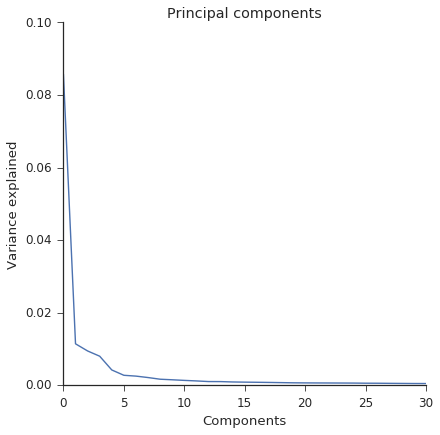

In [7]:
fig, ax = scdata.plot_pca_variance_explained(ylim=(0, 0.1), n_components=30)

In [8]:
NO_CMPNTS = 5
scdata.run_tsne(n_components=NO_CMPNTS, perplexity=30)

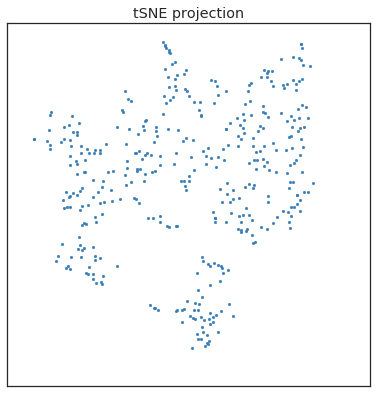

In [9]:
fig, ax = scdata.plot_tsne()

(<matplotlib.figure.Figure at 0x2b264c29fb38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b264c29fa90>)

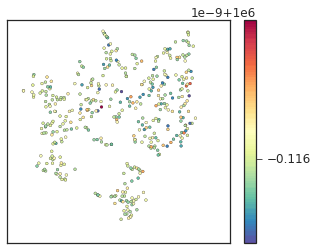

In [10]:
fig = plt.figure(figsize=[5, 4])
scdata.plot_tsne_by_cell_sizes(fig=fig)

In [11]:
scdata.run_diffusion_map()

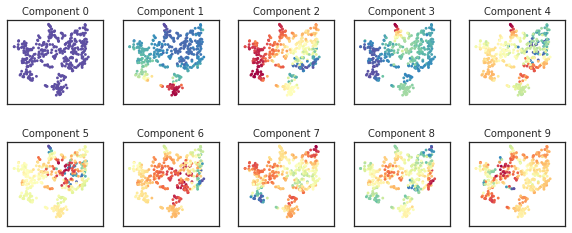

In [12]:
fig, ax = scdata.plot_diffusion_components()

In [13]:
scdata.run_diffusion_map_correlations()

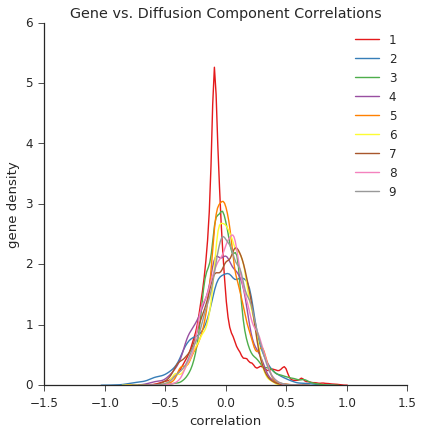

In [14]:
fig, ax = scdata.plot_gene_component_correlations()

In [15]:
scdata.data.columns = scdata.data.columns.str.upper()

In [16]:
scdata.run_gsea( output_stem= os.path.expanduser('~/.wishbone/gsea/mouse_marrow'))

Available GSEA .gmt files:

mouse:
gofat.bp.v1.0.gmt.txt
gofat.cc.v1.0.gmt.txt
gofat.mf.v1.0.gmt.txt

human:
c1.all.v5.0.symbols.gmt.txt
c2.all.v5.0.symbols.gmt.txt
c3.all.v5.0.symbols.gmt.txt
c5.all.v5.0.symbols.gmt.txt
c6.all.v5.0.symbols.gmt.txt
c7.all.v5.0.symbols.gmt.txt
gofat.bp.v1.0.gmt.txt
gofat.cc.v1.0.gmt.txt
gofat.mf.v1.0.gmt.txt
h.all.v5.0.symbols.gmt.txt

Please specify the gmt_file parameter as gmt_file=(organism, filename)


In [20]:
reports = scdata.run_gsea(output_stem= os.path.expanduser('~/.wishbone/gsea/mouse_marrow'), 
                    gmt_file=('mouse', 'gofat.bp.v1.0.gmt.txt'))

If running in notebook, please look at the command line window for GSEA progress log


In [21]:
!open ~/.wishbone/gsea/

Couldn't get a file descriptor referring to the console


In [22]:
# Component 1 enrichments
reports[1]['neg']

KeyError: 1

In [23]:
# Component 2 enrichments
reports[2]['pos']

KeyError: 2

In [24]:
scdata

SCData: 408 cells x 20037 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=True
diffusion_eigenvectors=True
diffusion_map_correlations=True
library_sizes=True
metadata=True
normalized=True
pca=True
tsne=True

In [17]:
# Wishbone class
wb = wishbone.wb.Wishbone(scdata)
wb.run_wishbone(start_cell='1771-026-187-E6', components_list=[1, 2], num_waypoints=150)

Building lNN graph...
lNN computed in : 0.00 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
......................................................................................................................................................
Time for determining distances and perspectives: 3.23 seconds
Determining branch point and branch associations...
Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9977
Iteration: 3
Correlation with previous iteration:  0.9982
Iteration: 4
Correlation with previous iteration:  0.9991
Iteration: 5
Correlation with previous iteration:  0.9997
Iteration: 6
Correlation with previous iteration:  0.9998
Iteration: 7
Correlation with previous iteration:  1.0000
6 realignment iterations


In [18]:
wb

Wishbone object: 408 cells x 20037 genes

branch=True
branch_colors=True
trajectory=True
waypoints=True

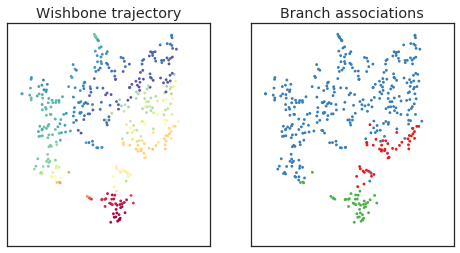

In [32]:
fig, ax = wb.plot_wishbone_on_tsne()
plt.savefig('wishbone/tracectory.pdf')

In [20]:
from matplotlib import cm

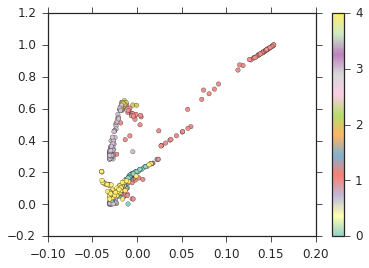

In [31]:
plt.scatter(scdata.diffusion_eigenvectors[1], wb.trajectory, c=info.loc[wb.branch.index]["day_int"], cmap=cm.Set3)
plt.colorbar(ticks=np.arange(np.min(info["day_int"]),np.max(info["day_int"])+1))
plt.savefig('wishbone/bifurcation.pdf')

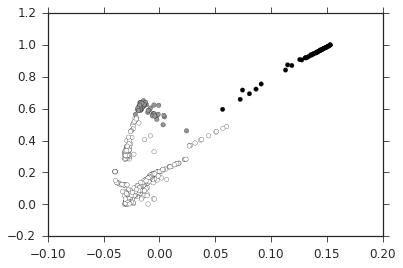

In [38]:
plt.scatter(scdata.diffusion_eigenvectors[1], wb.trajectory, c=wb.branch)
plt.savefig('wishbone/bifurcation_branches.pdf')

In [22]:
import pandas as pd

In [23]:
info = pd.read_csv('data/tcells_rebuttal.csv', index_col=0)

In [25]:
info.head()

,mapping_rate,reads,ERCC_content,MT_content,num_genes,pass_qc,day,cell_type,batch,bgplvm_2d_0,bgplvm_2d_1,pseudotime,assignment_prob_0,assignment_prob_1,branchtime,day_int,scaled_pseudotime
1771-026-187-A4,58.3133,3896411.0,685794.140253,59413.878238,1189,True,0,CD4+ T cell,026-187,1.066930,0.398297,-1.137538,0.500311,0.499689,0.72,0,0.061818
1771-026-187-B4,63.5948,1879316.0,281506.607105,78675.276820,2628,True,0,CD4+ T cell,026-187,-0.422201,1.077573,1.710693,0.756600,0.243400,0.72,0,0.840749
1771-026-187-B9,66.6844,3033191.0,703131.951030,64653.078928,1119,True,0,CD4+ T cell,026-187,1.167411,0.568630,-1.151186,0.501356,0.498644,0.72,0,0.058085
1771-026-187-C11,64.1202,5069762.0,664498.978177,68749.863388,1156,True,0,CD4+ T cell,026-187,1.218114,0.627906,-1.150485,0.501796,0.498204,0.72,0,0.058277
1771-026-187-D10,74.9924,4732249.0,699369.371218,65849.520846,943,True,0,CD4+ T cell,026-187,1.191595,0.220918,-1.032044,0.501757,0.498243,0.72,0,0.090668
